In [ ]:
!pip install fastbook
from fastbook import *


In [54]:
#search images using duck duck go scrapper
urls = search_images_ddg('black people photos', max_images=1)
print(len(urls), urls[0])

1 https://dm0qx8t0i9gc9.cloudfront.net/thumbnails/video/rZJIMvhmliwmde8a6/videoblocks-happy-black-african-man-in-suit-portrait-of-excited-cheerful-man-indoor-against-window-background_sh2ahadmq_thumbnail-1080_01.png


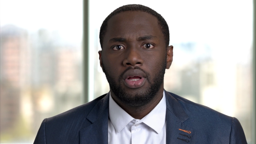

In [55]:
dest = Path('blackpeople.jpg')
if not dest.exists():
  download_url(urls[0], dest, show_progress=False)

im = Image.open(dest)
im.to_thumb(256,256)

#images are made up of 2d matrix with 0-256 color

In [56]:
import os
from pathlib import Path

searches = 'White people', 'Black People'
path = Path('black_or_white')

if not path.exists():
  path.mkdir()

for o in searches:
  dest = (path / o)
  results = search_images_ddg(f'{o} photo')
  download_images(dest, urls=results[:200])
  resize_images(dest, max_size=400, dest=path/o)


In [57]:
# broken images break the NN so this is used to discard all broken images
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#30) [None,None,None,None,None,None,None,None,None,None...]

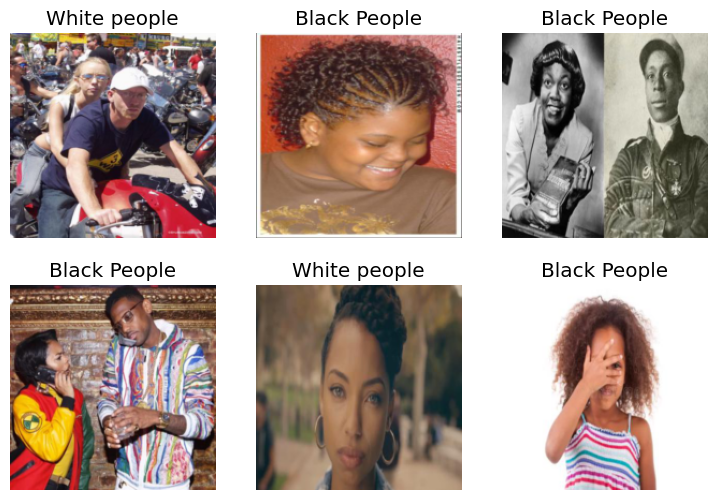

In [58]:
# Data block gives fast ai to give all parameters to create a data vision model dataset
dls = DataBlock(
    blocks = (ImageBlock,CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = [Resize(192, method='squish')]
).dataloaders(path)
#data block gives batches of data to ai model
dls.show_batch(max_n=6)

In [59]:
learn = vision_learner(dls, resnet18, metrics=error_rate)



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [60]:
# fine_tune() teach the model the differeces between your model and what it is built for
# adjusts the weights accordingly
learn.fine_tune(3)

In [62]:
is_black,_,probs = learn.predict(PILImage.create('blackpeople.jpg')) #predict whether it is a person is black or not
print(f'This is a: {is_black}. ')
print(f'Probability it is a black: {probs[0]:.4f}')


This is a: Black People. 
Probability it is a black: 0.9580


In [ ]:
#validation loss is a metric used to assess the performance of a deep learning model on the validation set. The validation set is a portion of the dataset set aside to validate the performance of the model.

#The training loss is a metric used to assess how a deep learning model fits the training data. That is to say, it assesses the error of the model on the training set.

#Error rate refers to a measure of the degree of prediction error of a model made with respect to the true model.

In [ ]:
import requests
from bs4 import BeautifulSoup
import urllib.parse

# Function to scrape images from Google
def scrape_images(query, num_images):
    # Prepare the Google search URL
    query = urllib.parse.quote_plus(query)
    url = f"https://www.google.com/search?q={query}&tbm=isch"

    # Send a GET request to the URL
    response = requests.get(url)

    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find all image elements on the page
    images = soup.find_all('img')

    # Download the images
    for i, image in enumerate(images[:num_images]):
        # Get the image source URL
        image_url = image['src']

        try:
            # Send a GET request to the image URL
            response = requests.get(image_url)

            # Save the image to a file
            with open(f"image_{i+1}.jpg", "wb") as f:
                f.write(response.content)

            print(f"Downloaded image {i+1}")
        except Exception as e:
            print(f"Error downloading image {i+1}: {e}")

# Example usage
query = "white people"  # Enter your search query here
num_images = 500  # Number of images to scrape

scrape_images(query, num_images)